In [1]:
import numpy as np
import matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Tipo de la imagen: <class 'numpy.ndarray'>
Forma de la imagen (alto, ancho, canales): (6000, 4000, 3)


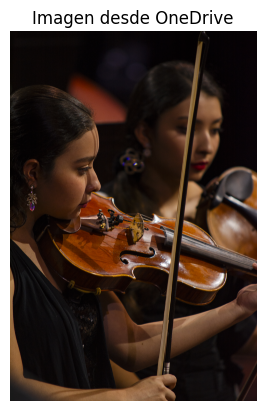

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta corregida de la imagen
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"

# Leer la imagen usando matplotlib
try:
    imagen = mpimg.imread(imagen_path)

    # Mostrar información de la imagen
    print("Tipo de la imagen:", type(imagen))
    print("Forma de la imagen (alto, ancho, canales):", imagen.shape)

    # Mostrar la imagen
    plt.imshow(imagen)
    plt.title("Imagen desde OneDrive")
    plt.axis('off')  # Desactivar los ejes
    plt.show()
except FileNotFoundError:
    print("Error: No se encontró el archivo en la ruta especificada.")

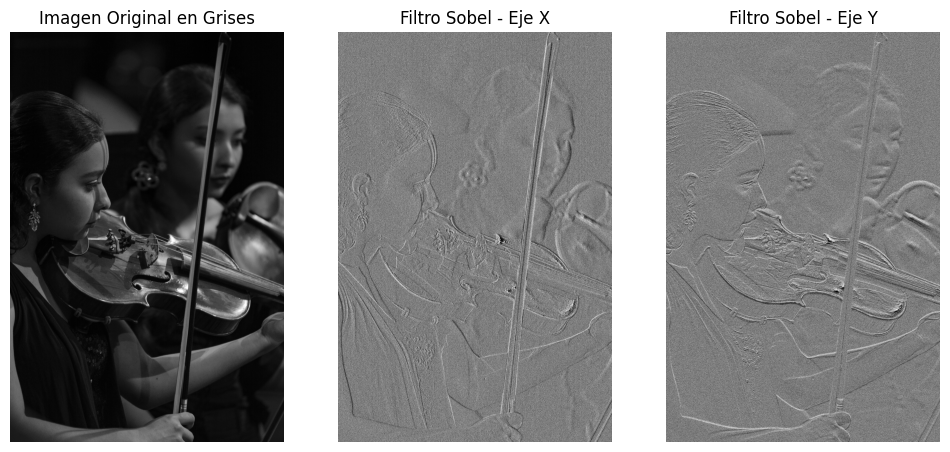

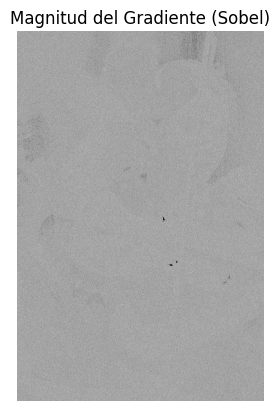

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Ruta de la imagen
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"

# Leer la imagen en escala de grises
try:
    # Cargar la imagen con matplotlib en escala de grises
    imagen = plt.imread(imagen_path)
    
    if len(imagen.shape) == 3:  # Si es RGB, convertir a escala de grises
        imagen_gris = np.mean(imagen, axis=2).astype(np.uint8)
    else:
        imagen_gris = imagen.astype(np.uint8)

    # Definir los kernels Sobel 3x3
    kernel_sobel_x = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

    kernel_sobel_y = np.array([[-1, -2, -1],
                               [0,  0,  0],
                               [1,  2,  1]])

    # Aplicar convolución manualmente usando scipy.ndimage.convolve
    sobel_x = convolve(imagen_gris, kernel_sobel_x, mode='reflect')
    sobel_y = convolve(imagen_gris, kernel_sobel_y, mode='reflect')

    # Calcular la magnitud del gradiente combinando Sobel X y Sobel Y
    sobel_magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_magnitud = (sobel_magnitud / sobel_magnitud.max() * 255).astype(np.uint8)

    # Mostrar los resultados
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title("Imagen Original en Grises")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title("Filtro Sobel - Eje X")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title("Filtro Sobel - Eje Y")
    plt.axis('off')

    plt.figure()
    plt.imshow(sobel_magnitud, cmap='gray')
    plt.title("Magnitud del Gradiente (Sobel)")
    plt.axis('off')

    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo en la ruta especificada.")
except Exception as e:
    print(f"Error inesperado: {e}")


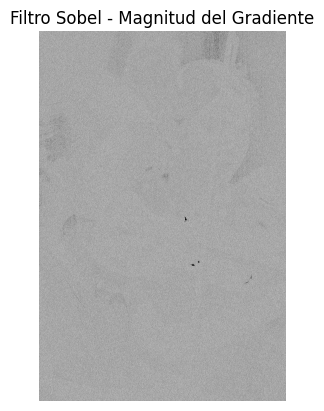

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Leer la imagen
imagen = plt.imread(r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg")
imagen_gris = np.mean(imagen, axis=2).astype(np.uint8) if imagen.ndim == 3 else imagen

# Kernels Sobel 3x3
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Convolución
sobel_x = convolve(imagen_gris, kernel_x)
sobel_y = convolve(imagen_gris, kernel_y)
sobel_magnitud = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Mostrar resultados
plt.imshow(sobel_magnitud, cmap='gray')
plt.axis('off')
plt.title("Filtro Sobel - Magnitud del Gradiente")
plt.show()

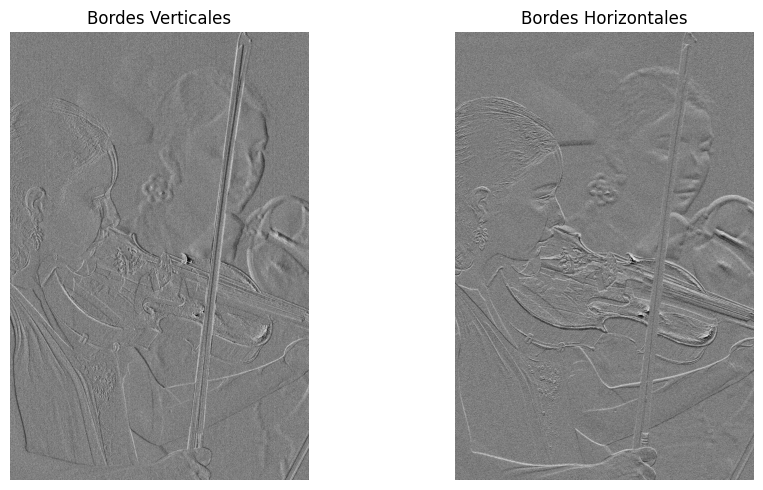

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Ruta de la imagen
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"

# Cargar la imagen y convertirla a escala de grises si es RGB
imagen = plt.imread(imagen_path)
imagen_gris = np.mean(imagen, axis=2).astype(np.uint8) if imagen.ndim == 3 else imagen

# Definir los filtros Sobel
filtro_horizontal = np.array([[-1, -2, -1], 
                              [0,   0,  0], 
                              [1,   2,  1]])  # Filtro Sobel vertical

filtro_vertical = np.array([[-1, 0, 1], 
                            [-2, 0, 2], 
                            [-1, 0, 1]])  # Filtro Sobel horizontal

# Aplicar la convolución con los filtros
bordes_verticales = convolve(imagen_gris, filtro_vertical, mode='reflect')
bordes_horizontales = convolve(imagen_gris, filtro_horizontal, mode='reflect')

# Mostrar las imágenes resultantes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bordes_verticales, cmap='gray')
plt.title("Bordes Verticales")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bordes_horizontales, cmap='gray')
plt.title("Bordes Horizontales")
plt.axis('off')

plt.tight_layout()
plt.show()

**Descripción del proceso**

* **Objetivo:** Aplicar el filtro Sobel para detectar bordes en una imagen mediante convolución en dos direcciones:

Filtro horizontal: Detecta bordes horizontales.
Filtro vertical: Detecta bordes verticales.

**Pasos del Código**

Cargar la imagen:

Se usa plt.imread para cargar la imagen desde una ruta.
Si la imagen está en RGB, se convierte a escala de grises calculando el promedio de los canales (rojo, verde y azul).

Definición de los filtros Sobel:

Filtro Sobel vertical (bordes horizontales).
Filtro Sobel horizontal (bordes verticales).

Aplicación de la convolución:

Se usa la función convolve de scipy.ndimage para aplicar cada filtro a la imagen:
Filtro vertical: Detecta bordes horizontales.
Filtro horizontal: Detecta bordes verticales.
La convolución realiza un producto punto entre el filtro y las regiones de la imagen.

Visualización de los resultados:

La imagen resultante del filtro Sobel vertical muestra los bordes horizontales.
La imagen resultante del filtro Sobel horizontal muestra los bordes verticales.
Ambas imágenes se muestran en escala de grises para una mejor interpretación.

**Resultados esperados**

Bordes Verticales: Resaltan los bordes donde hay cambios en la intensidad horizontal.
Bordes Horizontales: Resaltan los bordes donde hay cambios en la intensidad vertical.

**Importancia**

El filtro Sobel es un método sencillo y eficiente para detectar bordes en imágenes.
Es un primer paso clave en tareas como detección de contornos, segmentación y en redes neuronales para visión por computadora.

In [31]:
print(imagen.max)

print(imagen.min)

<built-in method max of numpy.ndarray object at 0x00000184356C0DB0>
<built-in method min of numpy.ndarray object at 0x00000184356C0DB0>


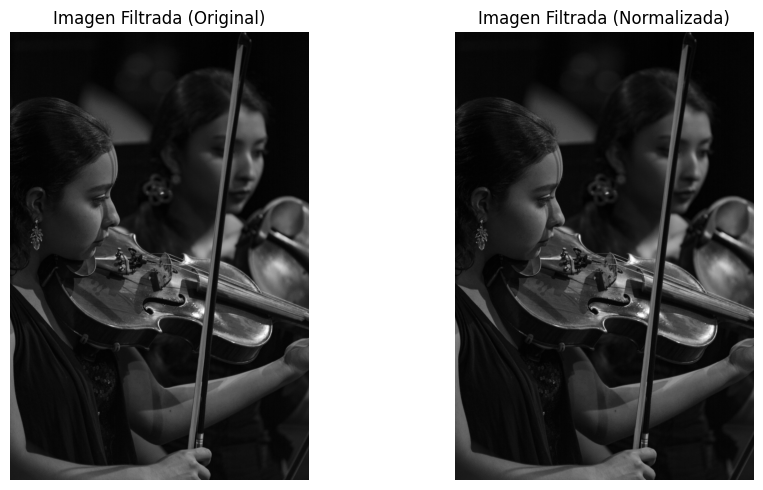

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar la imagen en escala de grises
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"
imagen = plt.imread(imagen_path)

# Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen_gris = np.mean(imagen, axis=2).astype(np.float32)
else:
    imagen_gris = imagen.astype(np.float32)

# Definir un filtro simple 3x3
filtro_3x3 = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9  # Filtro de promedio (suavizado)

# Aplicar la convolución
imagen_filtrada = convolve(imagen_gris, filtro_3x3, mode='reflect')

# Normalizar la imagen filtrada
imagen_min = np.min(imagen_filtrada)
imagen_max = np.max(imagen_filtrada)
imagen_normalizada = ((imagen_filtrada - imagen_min) / (imagen_max - imagen_min)) * 255
imagen_normalizada = imagen_normalizada.astype(np.uint8)

# Mostrar la imagen original y la normalizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title("Imagen Filtrada (Original)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_normalizada, cmap='gray')
plt.title("Imagen Filtrada (Normalizada)")
plt.axis('off')

plt.tight_layout()
plt.show()

Este código aplica un filtro de suavizado 3x3 a una imagen en escala de grises utilizando la operación de convolución con la función scipy.ndimage.convolve. Primero, la imagen se carga y, si es RGB, se convierte a escala de grises calculando el promedio de los canales. Posteriormente, se aplica el filtro, que realiza un promedio de los valores de píxeles vecinos para reducir detalles y suavizar la imagen. Luego, la imagen filtrada es normalizada al rango de 0 a 255 utilizando la fórmula: 

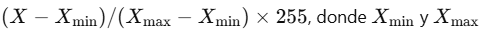

son los valores mínimo y máximo de la imagen filtrada. Finalmente, la imagen resultante se convierte al tipo de dato uint8 para facilitar su visualización, mostrando tanto la imagen original filtrada como la imagen normalizada.

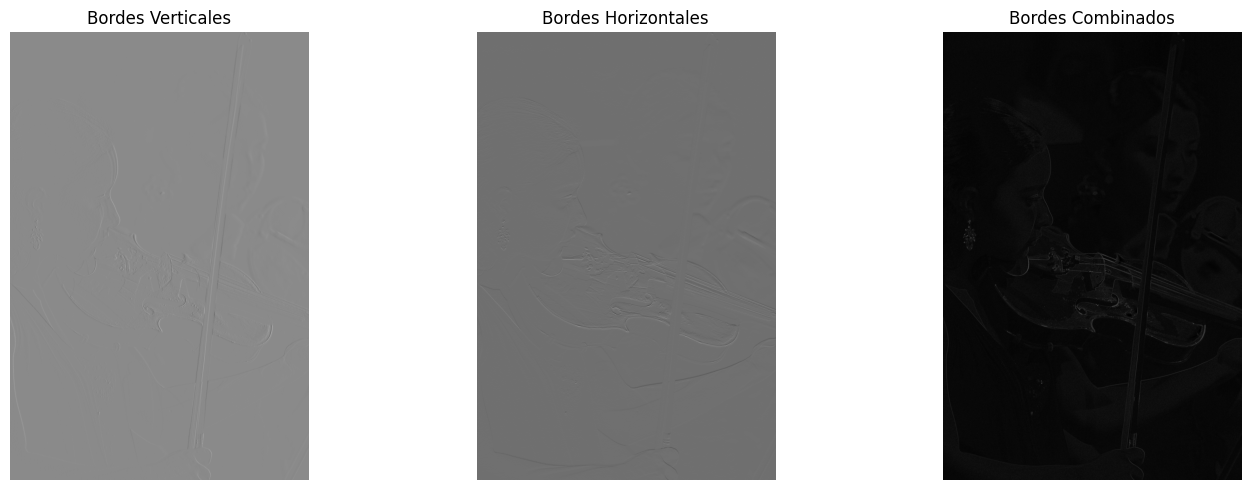

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar la imagen en escala de grises
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"
imagen = plt.imread(imagen_path)

# Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen_gris = np.mean(imagen, axis=2).astype(np.float32)
else:
    imagen_gris = imagen.astype(np.float32)

# Definir los filtros Sobel 3x3
filtro_horizontal = np.array([[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]])

filtro_vertical = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

# Aplicar la convolución para obtener bordes horizontales y verticales
bordes_horizontales = convolve(imagen_gris, filtro_horizontal, mode='reflect')
bordes_verticales = convolve(imagen_gris, filtro_vertical, mode='reflect')

# Calcular la magnitud del gradiente (bordes combinados)
bordes_combinados = np.sqrt(bordes_horizontales**2 + bordes_verticales**2)
bordes_combinados = (bordes_combinados / bordes_combinados.max() * 255).astype(np.uint8)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bordes_verticales, cmap='gray')
plt.title("Bordes Verticales")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bordes_horizontales, cmap='gray')
plt.title("Bordes Horizontales")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bordes_combinados, cmap='gray')
plt.title("Bordes Combinados")
plt.axis('off')

plt.tight_layout()
plt.show()

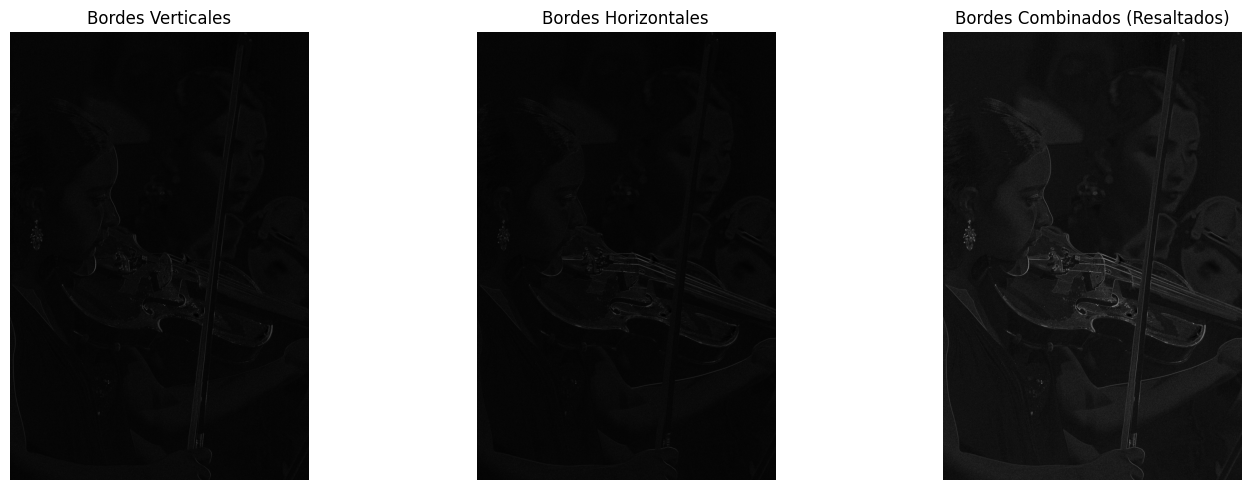

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar la imagen en escala de grises
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"
imagen = plt.imread(imagen_path)

# Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen_gris = np.mean(imagen, axis=2).astype(np.float32)
else:
    imagen_gris = imagen.astype(np.float32)

# Definir los filtros Sobel 3x3
filtro_horizontal = np.array([[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]])

filtro_vertical = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

# Aplicar la convolución para obtener bordes horizontales y verticales
bordes_horizontales = convolve(imagen_gris, filtro_horizontal, mode='reflect')
bordes_verticales = convolve(imagen_gris, filtro_vertical, mode='reflect')

# Calcular la magnitud del gradiente (bordes combinados) con un factor de resaltado
factor_resaltado = 2.0  # Ajusta este valor para mejorar la visibilidad
bordes_combinados = np.sqrt(bordes_horizontales**2 + bordes_verticales**2)
bordes_combinados = (factor_resaltado * bordes_combinados / bordes_combinados.max() * 255).clip(0, 255).astype(np.uint8)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(bordes_verticales), cmap='gray')
plt.title("Bordes Verticales")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(bordes_horizontales), cmap='gray')
plt.title("Bordes Horizontales")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bordes_combinados, cmap='gray')
plt.title("Bordes Combinados (Resaltados)")
plt.axis('off')

plt.tight_layout()
plt.show()

**Mejoras Aplicadas:**

**Factor de Resaltado:**

Multiplicamos la magnitud del gradiente por un factor de escala (factor_resaltado = 2.0).
Esto aumenta el contraste de los bordes combinados y los hace más visibles.

**Abs en Bordes Horizontales y Verticales:**

Aplicamos np.abs en los bordes horizontales y verticales antes de mostrarlos. Esto evita que los valores negativos oculten información visual.

**Clipping:**

Usamos .clip(0, 255) para asegurar que los valores estén en el rango correcto (0-255).

**Resultados Esperados:**
Los bordes horizontales y verticales se ven más definidos.
La imagen de bordes combinados tendrá mayor contraste y los contornos serán más claros.

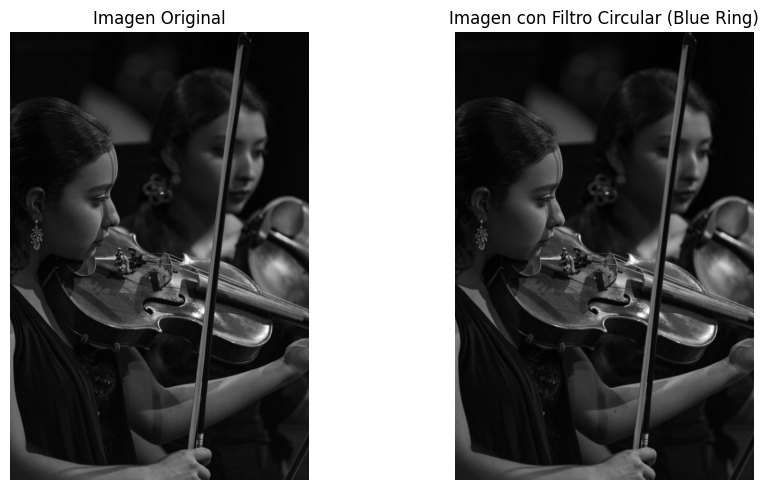

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar la imagen en escala de grises
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"
imagen = plt.imread(imagen_path)

# Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen_gris = np.mean(imagen, axis=2).astype(np.float32)
else:
    imagen_gris = imagen.astype(np.float32)

# Crear un filtro circular (Blue Ring) - Kernel 7x7 con valores radiales
def filtro_circular(tamano=7):
    centro = tamano // 2
    filtro = np.zeros((tamano, tamano), dtype=np.float32)
    for i in range(tamano):
        for j in range(tamano):
            distancia = np.sqrt((i - centro)**2 + (j - centro)**2)
            filtro[i, j] = 1 / (1 + distancia)
    filtro /= filtro.sum()  # Normalizar para que la suma sea 1
    return filtro

# Generar el filtro circular
kernel_circular = filtro_circular(7)

# Aplicar la convolución para obtener el efecto "Blue Ring"
imagen_filtrada = convolve(imagen_gris, kernel_circular, mode='reflect')

# Mostrar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title("Imagen con Filtro Circular (Blue Ring)")
plt.axis('off')

plt.tight_layout()
plt.show()

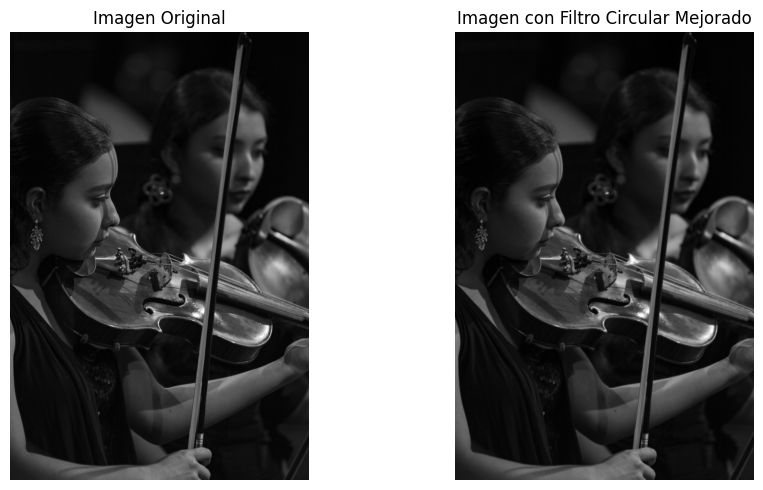

In [43]:
# Código Mejorado: Filtro Circular Más Notorio

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar la imagen en escala de grises
imagen_path = r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg"
imagen = plt.imread(imagen_path)

# Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen_gris = np.mean(imagen, axis=2).astype(np.float32)
else:
    imagen_gris = imagen.astype(np.float32)

# Crear un filtro circular mejorado
def filtro_circular(tamano=15):
    centro = tamano // 2
    filtro = np.zeros((tamano, tamano), dtype=np.float32)
    for i in range(tamano):
        for j in range(tamano):
            distancia = np.sqrt((i - centro)**2 + (j - centro)**2)
            filtro[i, j] = np.exp(-distancia / 3)  # Decae exponencialmente con la distancia
    filtro /= filtro.sum()  # Normalizar para que la suma sea 1
    return filtro

# Generar el filtro circular
kernel_circular = filtro_circular(15)  # Incrementamos el tamaño a 15x15

# Aplicar la convolución para obtener el efecto "Blue Ring"
imagen_filtrada = convolve(imagen_gris, kernel_circular, mode='reflect')

# Mostrar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.title("Imagen con Filtro Circular Mejorado")
plt.axis('off')

plt.tight_layout()
plt.show()

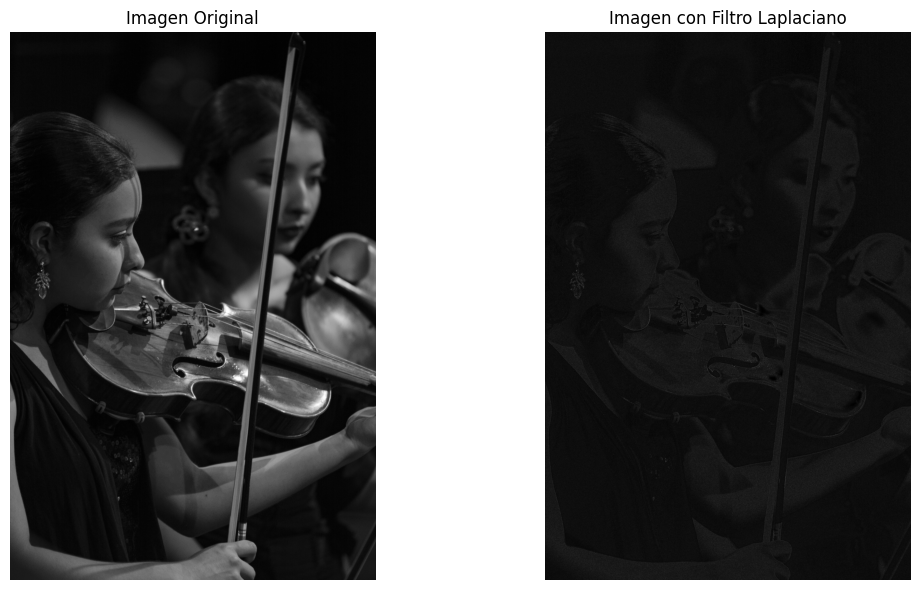

In [47]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar la imagen
imagen = plt.imread(r"C:\Users\jazfe\OneDrive\Imágenes\OCR\_CIR1134.jpg")

# Convertir a escala de grises si la imagen es RGB
if imagen.ndim == 3:  # Si tiene 3 dimensiones (R, G, B)
    imagen_gris = np.dot(imagen[..., :3], [0.2989, 0.5870, 0.1140])
else:
    imagen_gris = imagen

# Definir el kernel Laplaciano 3x3
kernel_laplaciano = np.array([[-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])

# Aplicar la convolución con el kernel Laplaciano
imagen_laplaciana = convolve(imagen_gris, kernel_laplaciano)

# Normalizar los valores para visualización
imagen_laplaciana = np.clip(imagen_laplaciana, 0, 255)

# Mostrar la imagen original y la imagen con filtro Laplaciano
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

# Imagen con filtro Laplaciano
plt.subplot(1, 2, 2)
plt.imshow(imagen_laplaciana, cmap="gray")
plt.title("Imagen con Filtro Laplaciano")
plt.axis("off")

plt.tight_layout()
plt.show()

El filtro Laplaciano es un tipo de filtro utilizado en procesamiento de imágenes para detectar bordes o áreas donde hay cambios bruscos en la intensidad de los píxeles. Se basa en las segundas derivadas de la imagen, lo que significa que resalta los puntos donde hay cambios rápidos en la intensidad, como los bordes de los objetos en la imagen.

¿Qué Hace el Filtro Laplaciano?
Detecta bordes en una imagen.
Resalta las regiones donde hay cambios bruscos en la intensidad (diferencias marcadas entre píxeles).
Calcula la segunda derivada de la imagen, que es más sensible a las variaciones que la primera derivada (como el Sobel).
No distingue direcciones (bordes verticales, horizontales, diagonales); actúa en todas las direcciones.

Principio Matemático
El filtro Laplaciano se relaciona con la segunda derivada espacial de una función, lo cual en imágenes corresponde a cómo cambia la intensidad de los píxeles respecto a sus vecinos. La segunda derivada detecta los puntos de inflexión, es decir, donde la intensidad cambia de forma significativa (por ejemplo, al pasar de una zona oscura a una zona clara, como en los bordes de un objeto).

Características del Filtro Laplaciano
El filtro Laplaciano utiliza una máscara (o kernel) que tiene el valor 8 en el centro y -1 en los píxeles vecinos. Este diseño permite que el valor del píxel central se compare con sus vecinos, calculando las diferencias que representan los bordes.